## Bipartite model for HCI in VA

what's going on:
-taking a stab at multiple options for code
-changing all expectations and performances to be properties of nodes. Can change to edges in later versions.



this some thoughts:
start with learning from self. 
other models where one can learn from others

start with each 1:1 learning to adjust performance and expectation
other model to compare where machines learn across people

Need to:
Add metrics from literature on learning. (P, D)
Add probability of interaction. Start with representations of usage levels
Add color coding for types of nodes.
Change values of expectations into an array belonging to node (for history, approx 7 instances)

Options:
add learning in public (office assistant)



## TO DO

--ADD #15 tests to setup tests

create variablity in persoanl assistant performance (perform poorly .2 of time)

if x assistant ubnderperfoms 5 times, cut interaction.

low performance for one VA and constant medium for other

consider adding office VA for shared in future model

add impression changes as expectations (p.959, Denrell.) 6th piece of info is weighted .3. And below50% when negaitve. 



In [51]:
## for python, to get pycx
#import os
#print os.getcwd()
#import sys
#module_path = os.path.abspath(os.path.join('.'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

#sys.path.append(os.path.join(os.getcwd(), "pycx-0.32"))    
    
#print sys.path

## Import libraries 

In [1]:

%matplotlib inline 
#taken from assignment

import networkx as nx
import numpy
import matplotlib.pyplot as plt

from networkx.algorithms import bipartite

#import matplotlib
#matplotlib.use('TkAgg')

import pylab as PL
import random as RD



RD.seed()

PoorVAProb = 0.2 #probability that VA severely underperforms


#col = {0:'w', 1:'k'} --  consider a property for perceivers only that illustrates level of expectations met


## Create graph

This part creates the bipartite graph with nodes and edges. Note: the current setup contains 6 nodes of one type and 10 of the other with variablity in connections
Note: NetworkX does not have a custom bipartite graph class but the Graph() or DiGraph() classes can be used to represent bipartite graphs. Keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set (this inhibits me from having personal targets learn from each other; expansion possible with tripartite on conglomerate sharing). The convention used in NetworkX is to use a node attribute named bipartite with values 0 or 1 to identify the sets each node belongs to.

## Option 1 (using)


In [2]:
B = nx.Graph()  #nx path graph?
#B.pos = nx.spring_layout(B)
B.add_nodes_from([1,2,3,4, 5, 6], bipartite=0) #perceivers, top nodes
# Add the node attribute "bipartite" - Targets = 1
B.add_nodes_from(['a','b','c', 'd','e', 'f', 'g', 'h', 'm', 'q'], bipartite=1)
B.add_edges_from([(1,'a'), (1,'e'), (1,'f'), (2,'b'), (2,'e'), (2,'g'), 
                  (3,'c'), (3,'e'), (3,'h'),(3,'g'),(4,'d'), (5, 'm'), (6, 'q')])



In [3]:
print((B.number_of_nodes(), B.number_of_edges())) 


(16, 13)


## Option 2 (not using)


In [29]:
# try naming sets
#perceivers = set([1,2,3,4,5,6])
#bipartite.is_bipartite_node_set(G,perceivers)


In [27]:
#targets = set(['a','b','c', 'd','e', 'f', 'g', 'h', 'm', 'q'])
#targets, perceivers = bipartite.sets(G) #gets error on ambiguous sets found in NetworkX 2. "AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets"

Below bool from Sayama, only TRUE in Option 2

In [28]:
#nx.is_connected(B)


## Create two sets for "bipartite"

Did this because False on nx.is.connected(B); better of for titling

Reference: https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.bipartite.html?highlight=bipartite


In [4]:
#make them targets and perceivers
perceivers = {n for n, d in B.nodes(data=True) if d['bipartite']==0} # perceivers top
targets = set(B) - perceivers

print perceivers
print targets

set([1, 2, 3, 4, 5, 6])
set(['a', 'c', 'b', 'e', 'd', 'g', 'f', 'h', 'm', 'q'])


{'a': 1, 1: 0, 2: 0, 3: 0, 'e': 1, 'd': 0, 'g': 1, 'f': 1, 'h': 1, 'm': 0, 'c': 1, 'q': 0, 'b': 1, 4: 1, 6: 1, 5: 1}


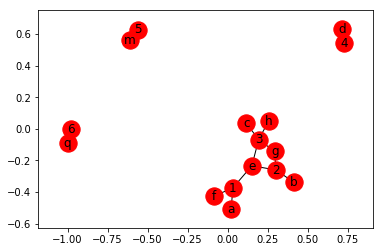

In [48]:
#B_layout = nx.spring_layout(B, iterations=1000)
#nx.draw_networkx(B, pos=B_layout)
#why are there no edges????

#c = bipartite.color(B)
#print(c)
nx.draw_networkx(B)

## Add attributes (option 1)
all values in setup are arbitrary during program development

In [5]:


#SET INITIAL WEIGHTS FOR EXPECTATIONS

B.node['a']['VA.type'] = 'personal assistant'
B.node['b']['VA.type'] = 'personal assistant'
B.node['c']['VA.type'] = 'personal assistant'
B.node['d']['VA.type'] = 'personal assistant'
B.node['m']['VA.type'] = 'personal assistant'
B.node['e']['VA.type'] = 'bank assistant'  # could open up learning through neighbors since public interaction
B.node['f']['VA.type'] = 'customer service assistant'
B.node['g']['VA.type'] = 'customer service assistant'
B.node['h']['VA.type'] = 'purchasing assistant'
B.node['q']['VA.type'] = 'health assistant'

#B.node['1']['expectation.1'] = 20 #an independent expectation? or owned by edge?
#say there are x factors involved in expectation. start with 3
#FIXME values are placeholders
B.node[1]['expectation.1'] = 100 #array.1 #FIXME to define array somewhere 
B.node[1]['expectation.2'] = 20 
B.node[1]['expectation.3'] = 60 

B.node[1]['expectation.1'] = 20 
B.node[1]['expectation.2'] = 40 
B.node[1]['expectation.3'] = 20 

B.node[1]['expectation.1'] = 20 #owned by edge so part of relationship
B.node[1]['expectation.2'] = 20 
B.node[1]['expectation.3'] = 20 #owned by edge so part of relationship

B.node[2]['expectation.1'] = 20 
B.node[2]['expectation.2'] = 20 
B.node[2]['expectation.3'] = 20 

B.node[2]['expectation.1'] = 20 
B.node[2]['expectation.2'] = 20 
B.node[2]['expectation.3'] = 20 

B.node[2]['expectation.1'] = 20 
B.node[2]['expectation.2'] = 20 
B.node[2]['expectation.3'] = 20 

B.node[3]['expectation.1'] = 20 
B.node[3]['expectation.2'] = 20 
B.node[3]['expectation.3'] = 20 

B.node[3]['expectation.1'] = 20 
B.node[3]['expectation.2'] = 20 
B.node[3]['expectation.3'] = 20 

B.node[3]['expectation.1'] = 20 
B.node[3]['expectation.2'] = 20 
B.node[3]['expectation.3'] = 20 

B.node[3]['expectation.1'] = 20 
B.node[3]['expectation.2'] = 20 
B.node[3]['expectation.3'] = 20 

B.node[4]['expectation.1'] = 20 
B.node[4]['expectation.2'] = 20 
B.node[4]['expectation.3'] = 20 

B.node[5]['expectation.1'] = 20 
B.node[5]['expectation.2'] = 20 
B.node[5]['expectation.3'] = 20 

B.node[6]['expectation.1'] = 20 
B.node[6]['expectation.2'] = 20 
B.node[6]['expectation.3'] = 20 

#setting performance variables
##Starting with performance variables as being owned by VA. but really should be owned by edge...

B.node['a']['performance.1'] = 0
B.node['a']['performance.2'] = 0
B.node['a']['performance.3'] = 0

B.node['b']['performance.1'] = 0
B.node['b']['performance.2'] = 0
B.node['b']['performance.3'] = 0

B.node['c']['performance.1'] = 0
B.node['c']['performance.2'] = 0
B.node['c']['performance.3'] = 0

B.node['d']['performance.1'] = 0
B.node['d']['performance.2'] = 0
B.node['d']['performance.3'] = 0

B.node['e']['performance.1'] = 0
B.node['e']['performance.2'] = 0
B.node['e']['performance.3'] = 0

B.node['f']['performance.1'] = 0
B.node['f']['performance.2'] = 0
B.node['f']['performance.3'] = 0

B.node['g']['performance.1'] = 0
B.node['g']['performance.2'] = 0
B.node['g']['performance.3'] = 0

B.node['h']['performance.1'] = 0
B.node['h']['performance.2'] = 0
B.node['h']['performance.3'] = 0

B.node['m']['performance.1'] = 0
B.node['m']['performance.2'] = 0
B.node['m']['performance.3'] = 0

B.node['q']['performance.1'] = 0
B.node['q']['performance.2'] = 0
B.node['q']['performance.3'] = 0

## Add attributes (Option 2, not using)

In [6]:


#SET INITIAL WEIGHTS FOR EXPECTATIONS

B.node['a']['VA.type'] = 'personal assistant'
B.node['b']['VA.type'] = 'personal assistant'
B.node['c']['VA.type'] = 'personal assistant'
B.node['d']['VA.type'] = 'personal assistant'
B.node['m']['VA.type'] = 'personal assistant'
B.node['e']['VA.type'] = 'bank assistant'  # could open up learning through neighbors since public interaction
B.node['f']['VA.type'] = 'customer service assistant'
B.node['g']['VA.type'] = 'customer service assistant'
B.node['h']['VA.type'] = 'purchasing assistant'
B.node['q']['VA.type'] = 'health assistant'

#B.node['1']['expectation.1'] = start at max bc why not #an independent expectation? or owned by edge?
#say there are x factors involved in expectation. start with 3
#FIXME values are placeholders
B.adj[1]['a']['expectation.1'] = 1 #array.1 #FIXME to define array somewhere 
B.adj[1]['a']['expectation.2'] = 1 
B.adj[1]['a']['expectation.3'] = 1 

B.adj[1]['e']['expectation.1'] = 1 
B.adj[1]['e']['expectation.2'] = 1 
B.adj[1]['e']['expectation.3'] = 1 

B.adj[1]['f']['expectation.1'] = 1 
B.adj[1]['f']['expectation.2'] = 1 
B.adj[1]['f']['expectation.3'] = 1 

B.adj[2]['b']['expectation.1'] = 1 
B.adj[2]['b']['expectation.2'] = 1 
B.adj[2]['b']['expectation.3'] = 1 

B.adj[2]['e']['expectation.1'] = 1 
B.adj[2]['e']['expectation.2'] = 1 
B.adj[2]['e']['expectation.3'] = 1 

B.adj[2]['g']['expectation.1'] = 1 
B.adj[2]['g']['expectation.2'] = 1 
B.adj[2]['g']['expectation.3'] = 1 

B.adj[3]['c']['expectation.1'] = 1 
B.adj[3]['c']['expectation.2'] = 1 
B.adj[3]['c']['expectation.3'] = 1 

B.adj[3]['e']['expectation.1'] = 1 
B.adj[3]['e']['expectation.2'] = 1 
B.adj[3]['e']['expectation.3'] = 1 

B.adj[3]['h']['expectation.1'] = 1 
B.adj[3]['h']['expectation.2'] = 1 
B.adj[3]['h']['expectation.3'] = 1 

B.adj[3]['g']['expectation.1'] = 1 
B.adj[3]['g']['expectation.2'] = 1 
B.adj[3]['g']['expectation.3'] = 1 

B.adj[4]['d']['expectation.1'] = 1 
B.adj[4]['d']['expectation.2'] = 1 
B.adj[4]['d']['expectation.3'] = 1 

B.adj[5]['m']['expectation.1'] = 1 
B.adj[5]['m']['expectation.2'] = 1 
B.adj[5]['m']['expectation.3'] = 1 

B.adj[6]['q']['expectation.1'] = 1 
B.adj[6]['q']['expectation.2'] = 1 
B.adj[6]['q']['expectation.3'] = 1 

#setting performance variables
##Starting with performance variables as being owned by VA. but really should be owned by edge...

B.node['a']['performance.1'] = 0
B.node['a']['performance.2'] = 0
B.node['a']['performance.3'] = 0

B.node['b']['performance.1'] = 0
B.node['b']['performance.2'] = 0
B.node['b']['performance.3'] = 0

B.node['c']['performance.1'] = 0
B.node['c']['performance.2'] = 0
B.node['c']['performance.3'] = 0

B.node['d']['performance.1'] = 0
B.node['d']['performance.2'] = 0
B.node['d']['performance.3'] = 0

B.node['e']['performance.1'] = 0
B.node['e']['performance.2'] = 0
B.node['e']['performance.3'] = 0

B.node['f']['performance.1'] = 0
B.node['f']['performance.2'] = 0
B.node['f']['performance.3'] = 0

B.node['g']['performance.1'] = 0
B.node['g']['performance.2'] = 0
B.node['g']['performance.3'] = 0

B.node['h']['performance.1'] = 0
B.node['h']['performance.2'] = 0
B.node['h']['performance.3'] = 0

B.node['m']['performance.1'] = 0
B.node['m']['performance.2'] = 0
B.node['m']['performance.3'] = 0

B.node['q']['performance.1'] = 0
B.node['q']['performance.2'] = 0
B.node['q']['performance.3'] = 0

## visualize graph (not using)
not using spring (which documemntation says is default...)

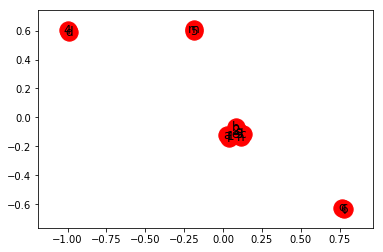

In [68]:
#B_layout = nx.spring_layout(B, iterations=1000)
#nx.draw_networkx(B, pos=B_layout)

## Test Connections
Only run this to test setup

In [7]:

#Test connections
nx.is_connected(B)
#bottom_nodes, top_nodes = bipartite.sets(B)



print B.number_of_nodes()
print B.number_of_edges()
print list(B.nodes)
print list(B.edges)
print list(targets)
print list(B.adj[1])
print B.degree[1]

print perceivers

print(bipartite.is_bipartite(B))
bipartite.is_bipartite_node_set(B,perceivers)
bipartite.is_bipartite_node_set(B,targets)

print dict(B.edges)
#bipartite code not working https://networkx.github.io/documentation/latest/reference/algorithms/bipartite.html
#sets(B[, perceivers])
#color(B)
#nx.connected_components(B)

16
13
['a', 1, 2, 3, 4, 5, 6, 'f', 'h', 'm', 'c', 'q', 'g', 'b', 'e', 'd']
[('a', 1), (1, 'e'), (1, 'f'), (2, 'b'), (2, 'e'), (2, 'g'), (3, 'h'), (3, 'c'), (3, 'e'), (3, 'g'), (4, 'd'), (5, 'm'), (6, 'q')]
['a', 'c', 'b', 'e', 'd', 'g', 'f', 'h', 'm', 'q']
['a', 'e', 'f']
3
set([1, 2, 3, 4, 5, 6])
True
{('a', 1): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (3, 'c'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (2, 'g'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (4, 'd'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (5, 'm'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (1, 'e'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (6, 'q'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (3, 'h'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (2, 'b'): {'expectation.1': 1, 'expectation.3': 1, 'expectation.2': 1}, (3, 'g'): {'expectation.1': 1, 'expectation.3':

## (placeholder) set initial expectations and performance values

In [14]:
def init():
    global B, nextB
    
    time = 0
    
    B = nx.Graph() # do i need to state this again?
    for i in B.nodes():
        B.node[i]['performance.1'] = .7 if random() < .5 else .3
    
    nextB = B.copy()
    #do i need to return anythign else?

## Draw network. NEED TO FILL THIS OUT


In [15]:
def draw():
    PL.cla()
    nx.draw(B, pos, node_color=range(24), node_size=600, cmap=plt.cm.Reds) #, pos = positions, edge_color = [col[network.node[n]['state']] for n in network.nodes()])
   # nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
    #https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_node_colormap.html
 
#    nx.draw(g, vmin = 0, vmax = 1,
#            node_color = [g.nodes[i]['state'] for i in g.nodes],
#            pos = g.pos)
    PL.axis('image')
    PL.title('t = ' + str(time))

In [ ]:
##in SPYDER
def draw():
    PL.cla()
    #nx.draw(B, pos, node_color=range(24), node_size=600, cmap=plt.cm.Reds) #, pos = positions, edge_color = [col[network.node[n]['state']] for n in network.nodes()])

   # nx.draw(B) #, pos = positions, edge_color = [col[network.node[n]['state']] for n in network.nodes()])
    nx.draw(B, vmin = 0, vmax = 1, 
            node_color = [B.nodes[i]['expectation'] for i in B.nodes], 
            cmap=plt.cm.Reds, 
            pos = g.pos)
    PL.axis('image')
    PL.title('t = ' + str(time))

## The STEP

In [16]:
def step():
    global time, B, nextB

    time += 1

 #this code assumes constant performance and also assumes constant interaction

    for i in B.nodes(): 
        for j in B.neighbors(i):
            
        if B.node[n]['performance.1'] == B.node[n]['expectation.1'] : #don't need type
           # nextB.node[i]['state'] = 100 #FIXME placeholder value
            nextB.node[n]]['expectation.1'] = 50
            for j in B.adj(i):
                if B.adj[j]['expectation.1'] < 60 : #if it's generally high
                    if RD.random() < PoorVAProb:
                   # if RD.random() < infectionProb:
                        nextB.node[i]['expectation.1'] = 5
                        break
                    else: # adaptive link cutting behavior
                        nextB.node[i]['expectation.1'] = B.node[i]['expectation.1'] + 10
        if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1'] :        # if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1']

           nextB.adj[perceiver][target]['expectation.1'] = 10
           
                
        else:
             nextB.adj[perceiver][target]['expectation.1'] = B.adj[perceiver][target]['expectation.1'] + 40
                
    del B
    B = nextB.copy()

## Step as line code (outside of fxn)

In [ ]:
for i in B.nodes(): #for i in perceiver():
        if B.node[i]['performance.1'] == B.adj[i][j]['expectation.1'] :
           # nextB.node[i]['state'] = 100 #FIXME placeholder value
            nextB.adj[perceiver][target]['expectation.1'] = 50
            for j in B.adj(i):
                if B.adj[j]['expectation.1'] < 60 : #if it's generally high
                    if RD.random() < PoorVAProb:
                   # if RD.random() < infectionProb:
                        nextB.node[i]['expectation.1'] = 5
                        break
                    else: # adaptive link cutting behavior
                        nextB.node[i]['expectation.1'] = B.node[i]['expectation.1'] + 10
        if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1'] :        # if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1']

           nextB.adj[perceiver][target]['expectation.1'] = 10
           
                
        else:
             nextB.adj[perceiver][target]['expectation.1'] = B.adj[perceiver][target]['expectation.1'] + 40
                

In [49]:
#import pycxsimulator
#pycxsimulator.GUI().start(func=[init,draw,step])

References

Sayama

https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html